<h1 align="center"><b>K-Means</b>
<hr>

##Instalacion de librerias

1. Necesitamos instalar la libreria tm (text-mining)
> Nos servirá para poder crear un corpus, que es un objeto para manipular cada una de las palabras de nuestros tweets.

In [1]:
install.packages('tm')
library(tm)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘slam’


Loading required package: NLP



## Exploración de datos preprocesados

In [2]:
tweets <- read.csv("vacuna_dataset_preprocesado.csv", sep=",")

2. Creamos un corpus para poder vectorizar los valores de cada palabra en el tweet

In [14]:
corpus <- Corpus(VectorSource(tweets$Clean.Tweet))

3. Creamos una matriz de terminos, ya explicado en SVM, luego sacamos los terminos que son mas usados, omitimos los menos usados (sparse)

In [15]:
tdm <- TermDocumentMatrix(corpus, 
                          control = list(minWordLength=c(1,Inf)))
t <- removeSparseTerms(tdm, sparse=0.98)
m <- as.matrix(t)

In [11]:
install.packages('ggrepel')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



4. Demos un vistazo a los terminos mas usados, a partir de su frecuencia en cada tweet, esto determinará los clusters mas adelante

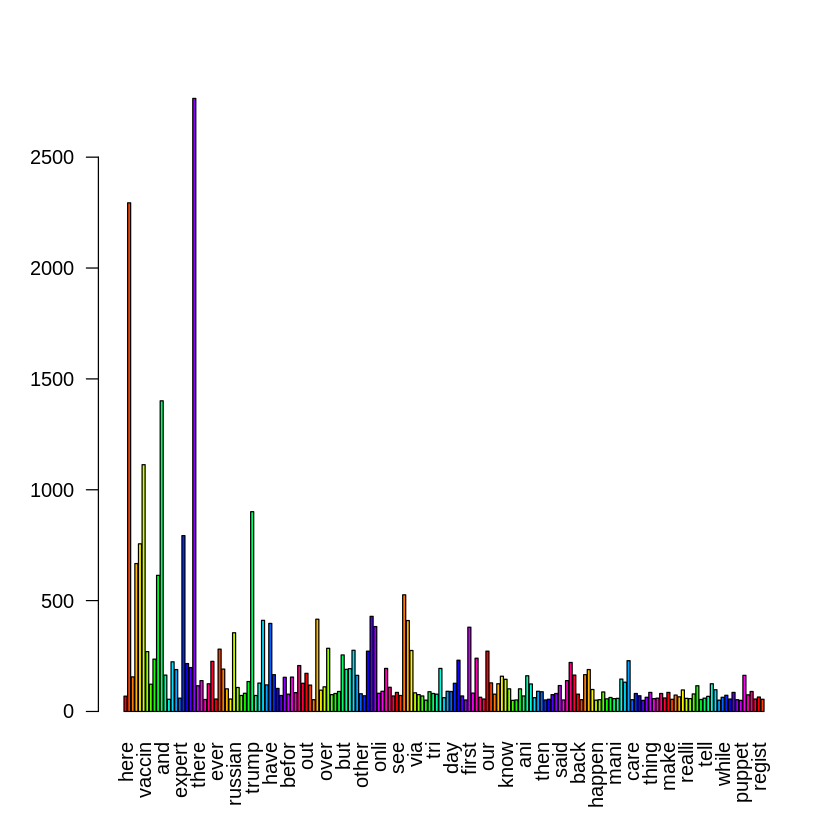

In [16]:
library(ggrepel)
library(ggplot2)
freq <- rowSums(m)
freq <- subset(freq, freq>=50)
barplot(freq, las=2, col = rainbow(25))

5. Agrupamiento jerarquico a partir de la distancia euclideana, representando los clusters en un dendograma

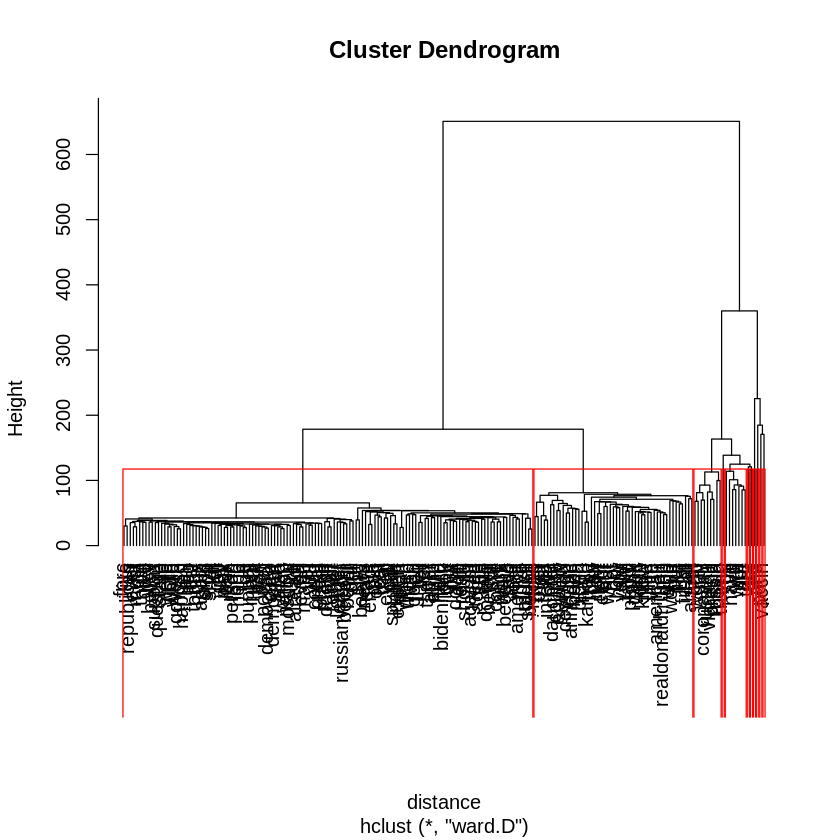

In [23]:
distance <- dist(scale(m))
hc <- hclust(distance, method = "ward.D")
plot(hc, hang=-1)
rect.hclust(hc, k=11)

6. Agrupamiento no jerarquico por k-means de palabras/tweets

In [25]:
m1 <- t(m)
set.seed(222)
k <- 2
kc <- kmeans(m1, k)
kc

K-means clustering with 2 clusters of sizes 540, 1501

Cluster means:
        here    putin realdonaldtrump    russia      that    vaccin  vladimir
1 0.04259259 1.242593      0.13148148 0.3314815 0.6629630 0.5277778 0.1425926
2 0.03064624 1.081279      0.05662891 0.3251166 0.2651566 0.5516322 0.1285809
        when        who       you       and       been bidenharri        can
1 0.10925926 0.19259259 0.5000000 1.2907407 0.13518519 0.02037037 0.18148148
2 0.04263824 0.08794137 0.2291805 0.4690207 0.06062625 0.02931379 0.08394404
       elect     expert       for       like        one       sure       the
1 0.17407407 0.02222222 0.5981481 0.15925926 0.15555556 0.02962963 3.3037037
2 0.06329114 0.03197868 0.3131246 0.08660893 0.07594937 0.01932045 0.6535643
       there      think       were       whi      would       ever      from
1 0.08333333 0.10000000 0.04814815 0.1000000 0.15000000 0.04444444 0.2166667
2 0.04730180 0.05662891 0.01865423 0.0473018 0.09660227 0.02131912 0.1092605
   